# Importing CSV

Often times data will be retrieved in the form of an excel document, we need to turn this into something python can read, luckily the pandas library can handle that for us! If you haven't already, make sure you use pip install pandas in your command line, as you will need it's dependancies before we get started. 

The code below does several things. 
First we import our library (pandas)

secondly, we take each of our CSVs and assign them to a variable that is easier to work with, for this example, I will use df (datafile) to refer to my data sets. 

Finally, we can use the describe() method to get a table of our data set. 

In [109]:
import pandas as pd
import numpy as np
import scipy as sp

df = pd.read_csv('heart.csv')
df2 = pd.read_csv('o2Saturation.csv')

#shows us a table of collumns and rows of our data, shows the mean, std, min, max, interquartile range
df.describe()




,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [110]:
df2.describe()

,98.6
count,3585.000000
mean,98.239275
std,0.726336
min,96.500000
25%,97.600000
50%,98.600000
75%,98.600000
max,99.600000


# Null values

Clearly missing values will impact the results for our data, so lets see how complete our data set is.

First let's see how many fields we are missing.
Since this data set is relatively complete, we don't expect to see any "True" results, which would indicate null values

In [111]:
#find any null values in our data
df.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

# Percentage null data

Since we know in this example that none of our values have any null data, we can move on, but what if you DID have null data?
We would want to know what percentage of that field was missing data, we can do this by running the following method

In [112]:
df.isnull().sum()/df.shape[0]

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

# Dropping duplicates 
An important part of Data Sciene and Data cleaning in general is making sure that we don't have excess numbers that skew our results. 
That being said, it should be obvious why removing duplicate data values is important to getting accurate results.

### drop_duplicates(inplace =True)

This code causes the data value in the current field to be dropped if it is in fact a duplicate of another value. 
For those already familiar with python, this is very similar to using array.pop()

In [113]:
df.drop_duplicates(inplace = True)

# Incomplete Data Sets

While this has no impact on the data set using in this example, what could we do if our data includes values that are empty (null)?

These results might skew our observation or experiment, so it is important to conider these things before we get into working with the data itself.

In the below example, we are trying to determine whether or not a certain amount of fields are blank, and if they are, we will remove the collumn from our list of considered items. 

In the example below, we will use a threshold of 60% by creating a new threshold variable, and applying it to a dropna() function.

In [114]:
thresh = len(df)*.6

# Checking AXIS


the axis here refers to whether or not we are dropping collumns or rows, in this case, we will drop collumns with values that are too low
### row = 0, collumn = 1
if the data has too many null values, it is simply not relevant enough to the study to inclue (it will skew the data disproportionately to reality,
or it doesn't corelate at all)

additionally, knowing the shape of our data is important 
first we will check our collumns to see if they meet our threshold cutoff, once we have done that we will work with rows
since we have 14 rows in this example project, let's cut out any rows that have 13 or less values


    again, this is a relatively complete data set, meaning we don't have many null values
    this type of cleaning becomes EXTREMELY important in larger data sets that are missing relevant information
    since incomplete results will skew our analysis.

alternatively we could also use the length of our "collums" to determine the acceptable number of blank row fields

In [115]:
df.dropna(thresh=thresh, axis =1).shape
df.dropna(thresh=13,axis=0).shape

(302, 14)

# Filling in missing values 

### Sometimes missing values are useful, but what if we have significant data in our entry, but are missing 1 value?

if you were working with machine learning, you could choose to replace missing row values with the mean or median of the group, even IQR
this could be useful in instances where, for example, you are conducting a survey, and partiticipants chose not to answer a certain question. 
that kind of thing COULD be meaningful for very specific types of surveys and help mitigate response bias, or various other factors, depending
on the survey method and participants perception of anonymity. This is mostly used for quantitavive values, but with some modifiation could also
be used for qualitative ones as well.

fill any age field that is missing with the median age of participants 
this is an example of the numeric data manipulation to "autofill" this section for live participants who might be chatting with assistants who
they may feel the need to skew the data for (or something, just a rough example)

In [116]:
df.age.fillna(df.age.median()).isnull().any()
# the same could be done for the mean, these are both very common methods for handling missing values, especially with larger sample sizes
df.age.fillna(df.age.mean()).isnull().any()

# both of these methods will return false, because again, we have no null values, but these would be effective in data sets that are incomplete

False

# Text Management
next we will talk about text management in theoretical terms. For this example, all of our data is quantitative, but what if for "sex" we allowed
for nonbinary identifaction (consider the impacts of HRT on heart disease for example, what if we wanted to track data like this?)
due to the nature of this particular file, that isn't something we can look at, so let's just consider the possibility and include code to do so.

#first we would need to ensure that all of the entered values were all the same case, that way we can more easily work with the data.
#henceforth throughout the project, we will refer to this as normalization, not to be confused with vector normalization.

First, let's check the first 5 values using the head() method (as a side note, if we wanted to check the end, we could use tail())

In [117]:
df.sex.head()

0    1
1    1
2    0
3    1
4    0
Name: sex, dtype: int64

The collumn on the left is denoting the index at which the value is stored, while the value on the right is telling us what gender the individual is

# Changing Text data to consitant types 

the following code snippet will allow us to change all of our code to lower case strings, which is useful to make sure all categories are consistant for later use. 

df.desc.apply(lambda x : x.lower())

df.desc.apply(lambda x : x.upper())

df.desc.apply(lambda x : x.title())


it simply depends on what is easiest for you to read, work with, and is really up to your preference!
Since our values are integers, it won't be used in this example, but it's here for you to work with if you like!

The following code will let us search through the categories of our data file to see how often various values occour. 

In [118]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [119]:
df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
71     3
37     2
38     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64

# String Cleaning 
Lambda functions keep everything in line and help keep your code readable and unbloated. 

### This code will look at your category, and for x in that category, convert it to a string, then a lower case string, then replace, 'unwanted string' with and empty value. This will let us transform mixed value variablees into something more useable, either for qualitative or quantitative analysis. Finally the Strip method removes any extra spaces at the ends


df.category = df.category.apply(lambda x :str(x).lower().replace('unwantedstring', '').strip())

If our data has a lot of "other" or "NaN" values we can still work with them. 
one way to do this is to use the following method

df.category = pandas.to_numeric(df.category, errors = 'coerce')

What this is actually doing is converting our values into numeric values. If there is an error, our option choice of coerce will cause the values to show as a NaN data type 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html


If there are still errors left, once again, we can do the following :  
    df.category.fillna(df.category.mean(),inplace = True)
    
    This code replaces all STILL missing values with the mean of the set

# While cleaning data, one of the most valuable things we can use to visualize it are histograms and box plots

<AxesSubplot:>

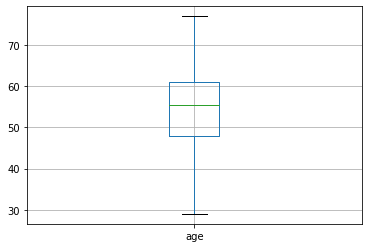

In [120]:
#This will let us create boxplots of our collumns, and their values, this is very useful for 
df.boxplot('age')

<AxesSubplot:>

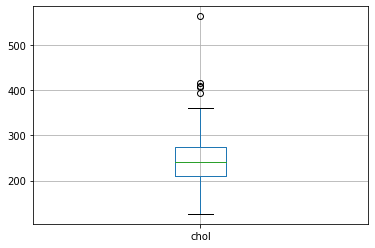

In [121]:
df.boxplot('chol')

array([[<AxesSubplot:title={'center':'chol'}>]], dtype=object)

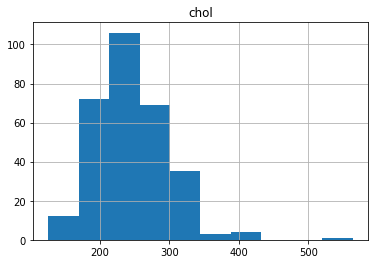

In [122]:
df.hist('chol')

In [123]:
df_clean = df[(df.chol < df.chol.quantile(.995)) & (df.chol > df.chol.quantile(.005))]

This removes results outside of 3 standard deviations from out data set, as they are likely to be major outliers that will skew our data strongly in one direction.

There are times when outliers are important information, and times when outliers are more cmplex to clear than this, but this is a simple example of how to do so. 

<AxesSubplot:>

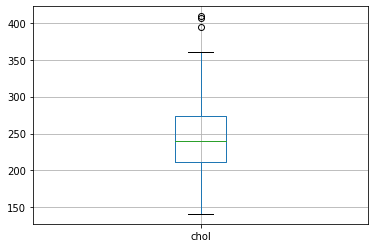

In [124]:
df_clean.boxplot('chol')

Lastly, let's talk about scaling data. This is the process of putting all values in the same numeric range, for example : 
Z scores :
    
    To calculate a Zscore, you take each number in a sample, and subtract it by the mean of that sample. Finally divide each value by the Standard deviation. That set of values are your Zscores


Alternatively you could find some other method of mean differencing to create a normalized range of values to work with.
This isn't as important for linear regression, but is incredibly important for k nearest neighhbors and other distance algorithms. Scaling can improve speed and quality of various algorithms in deep learning as well.

In [139]:
from sklearn.preprocessing import MinMaxScaler

The code below will allow us to normalize the values to begin using in ML / DL algorithms. We will be using just a bit of sklearn in this example.

In [148]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.age.values.reshape(-1,1))
scaler.transform(df.age.values.reshape(-1,1))

array([[0.70833333],
       [0.16666667],
       [0.25      ],
       [0.5625    ],
       [0.58333333],
       [0.58333333],
       [0.5625    ],
       [0.3125    ],
       [0.47916667],
       [0.58333333],
       [0.52083333],
       [0.39583333],
       [0.41666667],
       [0.72916667],
       [0.60416667],
       [0.4375    ],
       [0.60416667],
       [0.77083333],
       [0.29166667],
       [0.83333333],
       [0.625     ],
       [0.3125    ],
       [0.27083333],
       [0.66666667],
       [0.22916667],
       [0.875     ],
       [0.625     ],
       [0.45833333],
       [0.75      ],
       [0.5       ],
       [0.25      ],
       [0.75      ],
       [0.3125    ],
       [0.52083333],
       [0.45833333],
       [0.35416667],
       [0.52083333],
       [0.52083333],
       [0.75      ],
       [0.75      ],
       [0.45833333],
       [0.39583333],
       [0.33333333],
       [0.5       ],
       [0.20833333],
       [0.47916667],
       [0.3125    ],
       [0.375

We can also do this in one line with the following code 

In [150]:
scaler.fit_transform(df.age.values.reshape(-1,1))

array([[0.70833333],
       [0.16666667],
       [0.25      ],
       [0.5625    ],
       [0.58333333],
       [0.58333333],
       [0.5625    ],
       [0.3125    ],
       [0.47916667],
       [0.58333333],
       [0.52083333],
       [0.39583333],
       [0.41666667],
       [0.72916667],
       [0.60416667],
       [0.4375    ],
       [0.60416667],
       [0.77083333],
       [0.29166667],
       [0.83333333],
       [0.625     ],
       [0.3125    ],
       [0.27083333],
       [0.66666667],
       [0.22916667],
       [0.875     ],
       [0.625     ],
       [0.45833333],
       [0.75      ],
       [0.5       ],
       [0.25      ],
       [0.75      ],
       [0.3125    ],
       [0.52083333],
       [0.45833333],
       [0.35416667],
       [0.52083333],
       [0.52083333],
       [0.75      ],
       [0.75      ],
       [0.45833333],
       [0.39583333],
       [0.33333333],
       [0.5       ],
       [0.20833333],
       [0.47916667],
       [0.3125    ],
       [0.375